In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("loan_data.csv")


In [22]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [24]:
df.shape

(45000, 14)

In [25]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [26]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [27]:
df.duplicated().sum()

0

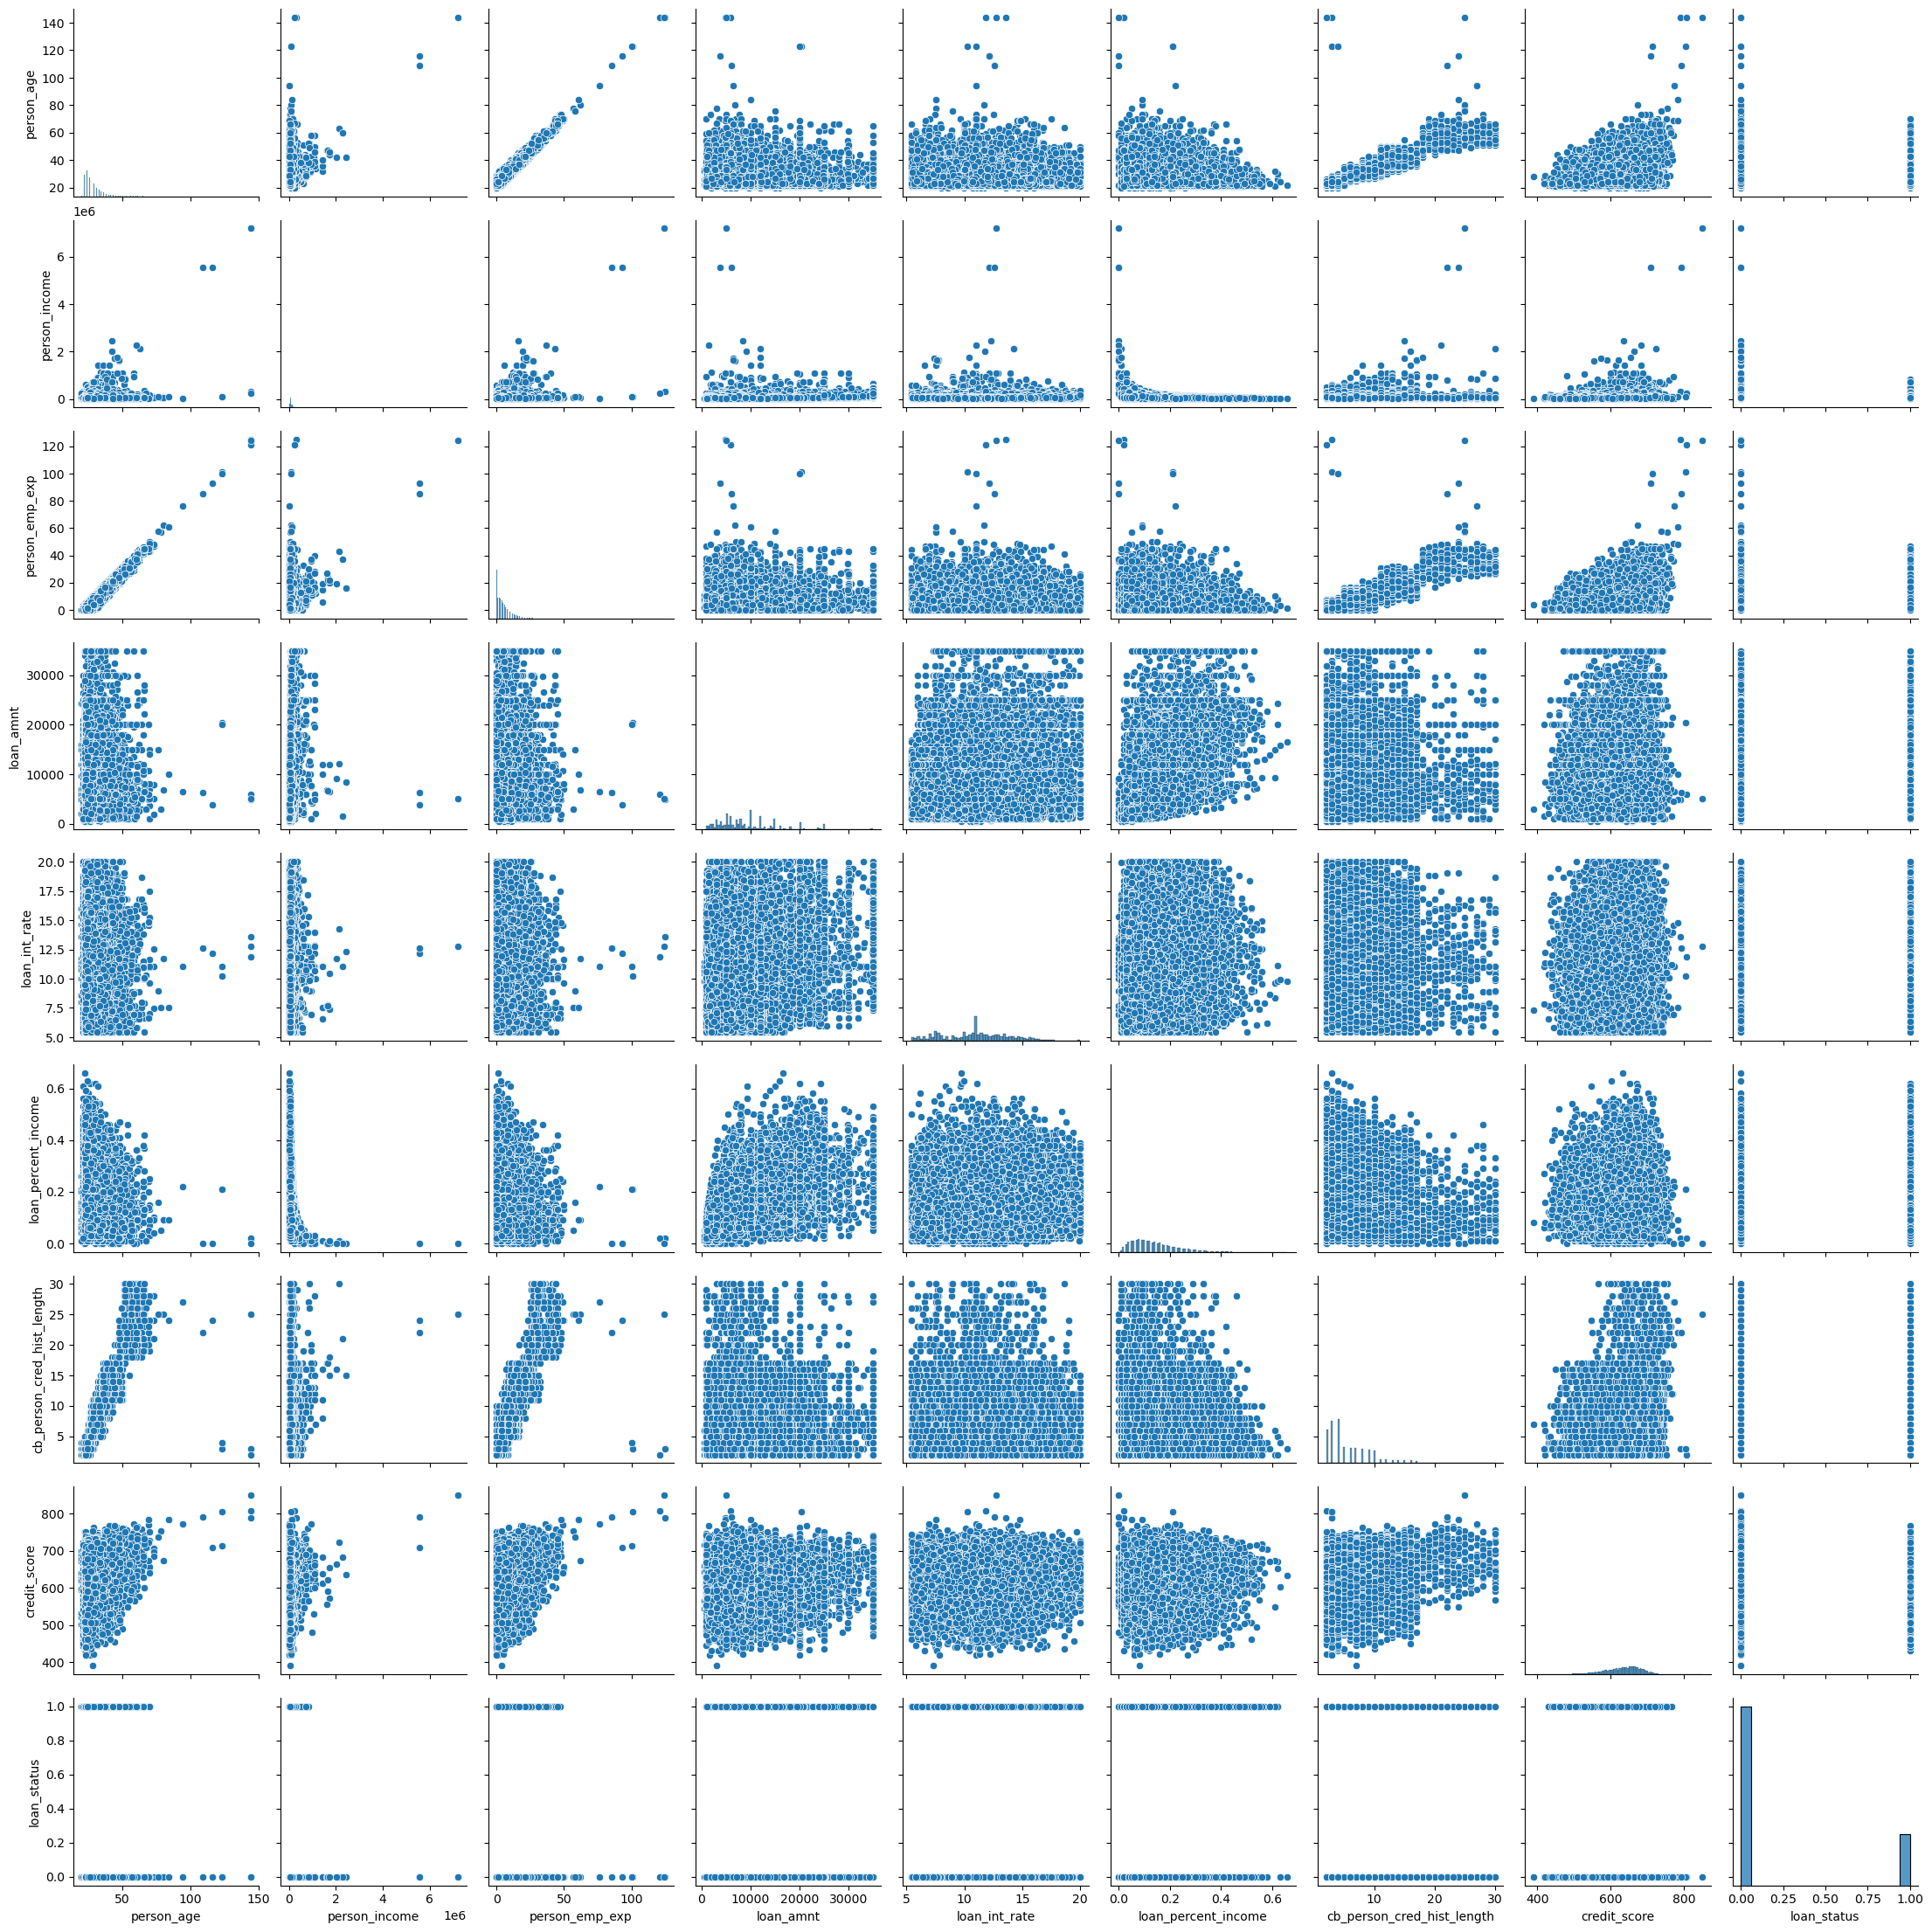

In [28]:
sns.pairplot(data=df)

In [29]:
df.loan_status.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['person_education']= label_encoder.fit_transform(df['person_education'])
df['person_home_ownership']= label_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent']= label_encoder.fit_transform(df['loan_intent'])

In [31]:
df["previous_loan_defaults_on_file"]=pd.get_dummies(df['previous_loan_defaults_on_file'],drop_first=True)
df["person_gender"]=pd.get_dummies(df['person_gender'],drop_first=True)

In [32]:
df["person_gender"]=df["person_gender"].astype(float)
df["person_education"]=df["person_education"].astype(float)
df["person_emp_exp"]=df["person_emp_exp"].astype(float)
df["person_home_ownership"]=df["person_home_ownership"].astype(float)
df["loan_intent"]=df["loan_intent"].astype(float)
df["credit_score"]=df["credit_score"].astype(float)
df["previous_loan_defaults_on_file"]=df["previous_loan_defaults_on_file"].astype(float)
df["loan_status"]=df["loan_status"].astype(float)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  float64
 2   person_education                45000 non-null  float64
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  float64
 5   person_home_ownership           45000 non-null  float64
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  float64
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  float64
 12  previous_loan_defaults_on_file  

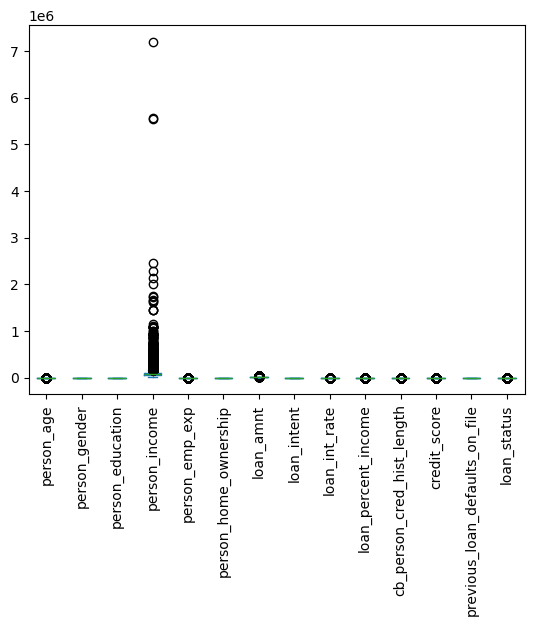

In [34]:
df.plot(kind="box")
plt.xticks(rotation=90)
plt.show()

In [35]:
def outlier(df,fts):
    df_no_outliers=df.copy()
    for ft in fts:
        threshold=2
        mean= np.mean(df_no_outliers[ft])
        std=np.std(df_no_outliers[ft])
        z_score=(df_no_outliers[ft] - mean)/std
        df_no_outliers=df_no_outliers[np.abs(z_score)<threshold]
    return df_no_outliers

In [36]:
fts=['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file']
df=outlier(df,fts)


In [37]:
df.shape

(32868, 14)

<Axes: xlabel='person_income', ylabel='Count'>

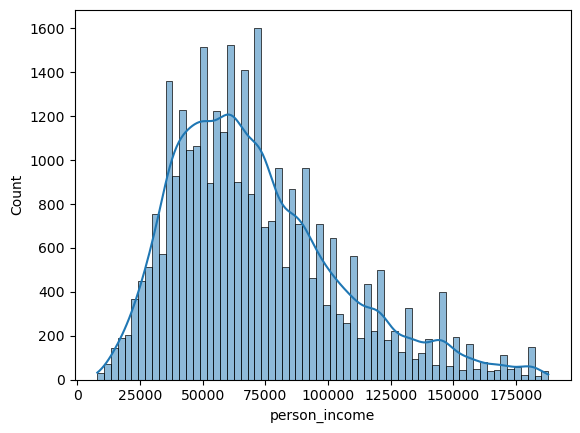

In [38]:
sns.histplot(df['person_income'], kde=True)

In [39]:
X=df.drop("loan_status",axis=1)
y=df["loan_status"]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [42]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

In [45]:
model=RandomForestClassifier(class_weight='balanced',random_state=24)
model.fit(X_resampled,y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=24)

In [46]:
y_pred=model.predict(X_test_scaled)

In [47]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.90492850623669


In [49]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                          param_distributions=param_grid,
                          n_iter=10,
                          scoring='roc_auc',
                          cv=3,
                          random_state=42)
grid.fit(X_resampled, y_resampled)
print("Best Params:", grid.best_params_)

# Re-train best model
best_model = grid.best_estimator_
best_model.fit(X_resampled, y_resampled)

Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [50]:
y_pred=best_model.predict(X_test_scaled)

In [62]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

print(roc_auc_score(y_test,y_probs))

0.9580544286999721


In [63]:
print("C_report:",classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
auc=accuracy_score(y_test,y_pred)

C_report:               precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      5398
         1.0       0.71      0.80      0.76      1176

    accuracy                           0.91      6574
   macro avg       0.83      0.87      0.85      6574
weighted avg       0.91      0.91      0.91      6574

Accuracy: 0.9069059933069669


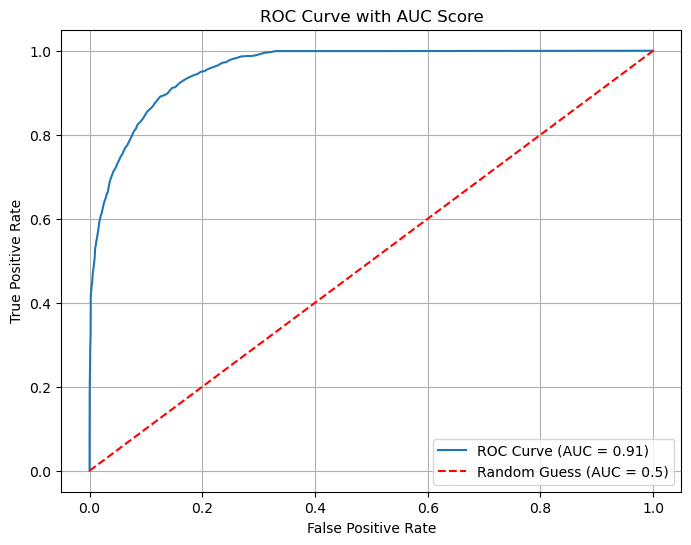

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Random Guess (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with AUC Score")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

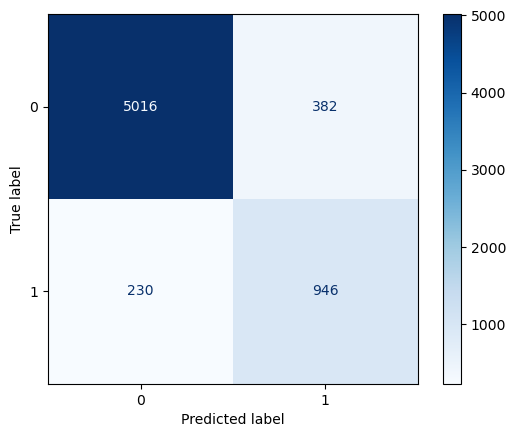

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

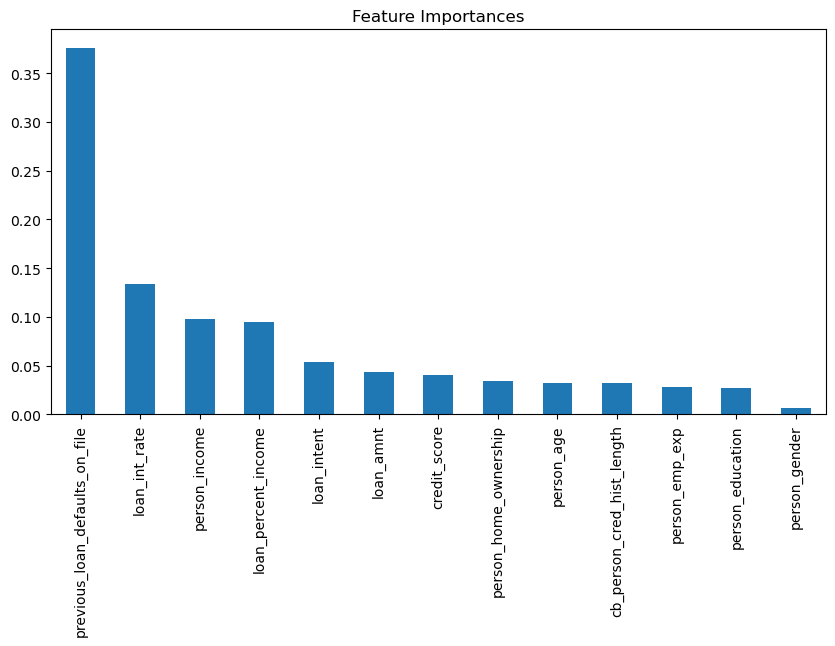

In [57]:
importances = model.feature_importances_
features = X.columns
forest_importances = pd.Series(importances, index=features)

forest_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importances")
plt.show()

In [65]:
#Overfitting check
y_train_pred = model.predict(X_resampled)
y_test_pred = model.predict(X_test_scaled)
print("Accuracy of train model:",accuracy_score(y_resampled,y_train_pred))
print("Accuracy of test model:",accuracy_score(y_test,y_test_pred))


Accuracy of train model: 1.0
Accuracy of test model: 0.90492850623669
